# Convert SnowMIP forcing files to CLASSIC
https://cccma.gitlab.io/classic/makeInputFiles.html

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

## Col de Porte site (FR-Cdp)

**5.4 Col de Porte, France**

Grassy meadow bordered by coniferous forest. Soils are 30% clay, 60% sand and 10% silt.

**Table 5.4: Col de Porte site characteristics**

| Short name | cdp |
|:-----------|:----|
| Location | 45.30ºN, 5.77ºE |
| Elevation | 1325 m |
| Snow-free albedo | 0.2 |
| Simulation period | 1 October 1994 to 30 September 2014 |
| Temperature/humidity measurement height | 1.5 m above the snow surface |
| Wind measurement height | 10 m |
| Reference | Morin et al. (2012) |

In [2]:
site_CLASSIC = 'FR-Cdp'
site_SnowMIP = 'cdp'

year_start = '1993'
year_end = '2022'

lat = 45.30
lon = 5.77

# path = '/home/lalandmi/Dropbox/data/SnowMIP/forcing'
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'
path_tmp = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tmp'
path_out = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/'+site_CLASSIC+'_lejeune2019'
path_out_CLASSIC = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/'+site_CLASSIC+'_lejeune2019/forcing'

if os.path.exists(path_out):
    print(path_out+' already exist.')
else:
    os.makedirs(path_out)
    print(path_out+' has been created!')

if os.path.exists(path_out_CLASSIC):
    print(path_out_CLASSIC+' already exist.')
else:
    os.makedirs(path_out_CLASSIC)
    print(path_out_CLASSIC+' has been created!')

/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/FR-Cdp_lejeune2019 already exist.
/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/FR-Cdp_lejeune2019/forcing already exist.


### Open original forcing file

In [19]:
ds = xr.open_dataset(path+'/CRYOBSCLIM.CDP.2018.MetInsitu.nc')
ds

<xarray.Dataset>
Dimensions:       (Number_of_points: 1, time: 254209)
Coordinates:
  * time          (time) datetime64[ns] 1993-08-01T06:00:00 ... 2022-08-01T06...
Dimensions without coordinates: Number_of_points
Data variables:
    FRC_TIME_STP  float32 ...
    CO2air        (time, Number_of_points) float32 ...
    DIR_SWdown    (time, Number_of_points) float32 ...
    flag          (time, Number_of_points) float32 ...
    HUMREL        (time, Number_of_points) float32 ...
    LWdown        (time, Number_of_points) float32 ...
    NEB           (time, Number_of_points) float32 ...
    PSurf         (time, Number_of_points) float32 ...
    Qair          (time, Number_of_points) float32 ...
    Rainf         (time, Number_of_points) float32 ...
    SCA_SWdown    (time, Number_of_points) float32 ...
    Snowf         (time, Number_of_points) float32 ...
    Tair          (time, Number_of_points) float32 ...
    Wind          (time, Number_of_points) float32 ...
    Wind_DIR      (time, Number_of_points) float32 ...
    LAT           (Number_of_points) float32 ...
    LON           (Number_of_points) float32 ...
    UREF          (Number_of_points) float32 ...
    ZREF          (Number_of_points) float32 ...
    ZS            (Number_of_points) float32 ...
    aspect        (Number_of_points) float32 ...
    slope         (Number_of_points) float32 ...
    station       (Number_of_points) float32 ...

In [21]:
# Check if there are leap years
# ds.sel(time='2004-02')

<xarray.Dataset>
Dimensions:  (time: 696)
Coordinates:
  * time     (time) datetime64[ns] 2004-02-01 ... 2004-02-29T23:00:00
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

### Slice file to full years (as CLASSIC expect only full years)
It is not required as long as you only use the full years in the job file

In [20]:
year_start_full = str(int(year_start) + 1)
year_end_full = str(int(year_end) - 1)

ds_subset = ds.sel(time=slice(year_start_full, year_end_full))
ds_subset

<xarray.Dataset>
Dimensions:       (Number_of_points: 1, time: 245448)
Coordinates:
  * time          (time) datetime64[ns] 1994-01-01 ... 2021-12-31T23:00:00
Dimensions without coordinates: Number_of_points
Data variables:
    FRC_TIME_STP  float64 3.6e+03
    CO2air        (time, Number_of_points) float32 ...
    DIR_SWdown    (time, Number_of_points) float32 ...
    flag          (time, Number_of_points) float32 ...
    HUMREL        (time, Number_of_points) float32 ...
    LWdown        (time, Number_of_points) float32 ...
    NEB           (time, Number_of_points) float32 ...
    PSurf         (time, Number_of_points) float32 ...
    Qair          (time, Number_of_points) float32 ...
    Rainf         (time, Number_of_points) float32 ...
    SCA_SWdown    (time, Number_of_points) float32 ...
    Snowf         (time, Number_of_points) float32 ...
    Tair          (time, Number_of_points) float32 ...
    Wind          (time, Number_of_points) float32 ...
    Wind_DIR      (time, Number_of_points) float32 ...
    LAT           (Number_of_points) float32 45.295
    LON           (Number_of_points) float32 5.765333
    UREF          (Number_of_points) float32 10.0
    ZREF          (Number_of_points) float32 1.5
    ZS            (Number_of_points) float32 1325.0
    aspect        (Number_of_points) float32 10.0
    slope         (Number_of_points) float32 0.0
    station       (Number_of_points) float32 38472400.0

In [9]:
ds_subset.time.encoding['units'] = 'hours since 1900-01-01 00:00:00.0'
ds_subset.time.encoding

In [16]:
ds_subset.to_netcdf(path_tmp+'/CRYOBSCLIM.CDP.2018.MetInsitu.nc')

### Convert time from relative to absolute
https://sourceforge.net/p/nco/discussion/9830/thread/175b4c98e1/?limit=25

The time format `day as %Y%m%d.%f` is <mark>**required** by CLASSIC</mark>

Note: you need CDO installed to run the next cell (`!` allow to run bash command in the notebook)

In [17]:
!cdo -a -f nc copy {path_tmp}/CRYOBSCLIM.CDP.2018.MetInsitu.nc {path_tmp}/CRYOBSCLIM.CDP.2018.MetInsitu_a.nc

cdo    copy:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    copy: Processed 3436280 values from 22 variables over 245448 timesteps [106.61s 1638MB]


## Open the new file with absolute time

In [38]:
ds = xr.open_dataset(path_tmp+'/CRYOBSCLIM.CDP.2018.MetInsitu_a.nc')
ds

<xarray.Dataset>
Dimensions:     (Number_of_points: 1, time: 245448)
Coordinates:
  * time        (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
Dimensions without coordinates: Number_of_points
Data variables:
    CO2air      (time, Number_of_points) float32 ...
    DIR_SWdown  (time, Number_of_points) float32 ...
    flag        (time, Number_of_points) float32 ...
    HUMREL      (time, Number_of_points) float32 ...
    LWdown      (time, Number_of_points) float32 ...
    NEB         (time, Number_of_points) float32 ...
    PSurf       (time, Number_of_points) float32 ...
    Qair        (time, Number_of_points) float32 ...
    Rainf       (time, Number_of_points) float32 ...
    SCA_SWdown  (time, Number_of_points) float32 ...
    Snowf       (time, Number_of_points) float32 ...
    Tair        (time, Number_of_points) float32 ...
    Wind        (time, Number_of_points) float32 ...
    Wind_DIR    (time, Number_of_points) float32 ...
    LAT         (Number_of_points) float32 ...
    LON         (Number_of_points) float32 ...
    UREF        (Number_of_points) float32 ...
    ZREF        (Number_of_points) float32 ...
    ZS          (Number_of_points) float32 ...
    aspect      (Number_of_points) float32 ...
    slope       (Number_of_points) float32 ...
    station     (Number_of_points) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [39]:
ds.time

<xarray.DataArray 'time' (time: 245448)>
array([19940101.      , 19940101.041667, 19940101.083333, ..., 20211231.875   ,
       20211231.916667, 20211231.958333])
Coordinates:
  * time     (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

### Add the lat/lon dimensions of the site (<mark>required by CLASSIC</mark>)

Example for Col de Porte -> Location: 45.30ºN, 5.77ºE

Note: the values of the coordinates does not seem to matter for CLASSIC (the attributes neither)

In [40]:
ds = ds.squeeze().assign_coords(lon=lon)
ds = ds.expand_dims('lon')
ds['lon'] = ds.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds = ds.assign_coords(lat=lat)
ds = ds.expand_dims('lat')
ds['lat'] = ds.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds = ds.transpose('time', 'lat', 'lon')

ds

<xarray.Dataset>
Dimensions:     (lat: 1, lon: 1, time: 245448)
Coordinates:
  * time        (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon         (lon) float64 5.77
  * lat         (lat) float64 45.3
Data variables:
    CO2air      (time, lat, lon) float32 0.00062 0.00062 ... 0.00062 0.00062
    DIR_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag        (time, lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    HUMREL      (time, lat, lon) float32 99.0 99.0 98.0 98.0 ... 36.0 35.0 28.0
    LWdown      (time, lat, lon) float32 297.8 300.0 298.6 ... 265.3 264.6 265.6
    NEB         (time, lat, lon) float32 0.94 0.95 0.97 0.98 ... 0.07 0.16 0.2
    PSurf       (time, lat, lon) float32 86210.0 86200.0 ... 87867.0 87845.0
    Qair        (time, lat, lon) float32 0.0045386637 ... 0.0024531723
    Rainf       (time, lat, lon) float32 0.0 0.00022222222 0.0 ... 0.0 0.0 0.0
    SCA_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf       (time, lat, lon) float32 0.0019166666 0.0 ... 0.0 0.0
    Tair        (time, lat, lon) float32 273.66 273.96 272.36 ... 282.06 283.26
    Wind        (time, lat, lon) float32 1.8 0.7 2.5 2.2 1.5 ... 0.8 0.8 0.9 0.2
    Wind_DIR    (time, lat, lon) float32 320.0 240.0 120.0 ... 343.0 304.0 291.0
    LAT         (lat, lon) float32 45.295
    LON         (lat, lon) float32 5.765333
    UREF        (lat, lon) float32 10.0
    ZREF        (lat, lon) float32 1.5
    ZS          (lat, lon) float32 1325.0
    aspect      (lat, lon) float32 10.0
    slope       (lat, lon) float32 0.0
    station     (lat, lon) float32 38472400.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

### Convert temperature to °C (<mark>required by CLASSIC</mark>)

In [41]:
with xr.set_options(keep_attrs=True):
    ds['Tair'] = ds['Tair'] - 273.15
    ds.Tair.attrs['units'] = '°C'
ds.Tair

<xarray.DataArray 'Tair' (time: 245448, lat: 1, lon: 1)>
array([[[ 0.51000977]],

       [[ 0.80999756]],

       [[-0.79000854]],

       ...,

       [[ 8.910004  ]],

       [[ 8.910004  ]],

       [[10.110016  ]]], dtype=float32)
Coordinates:
  * time     (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon      (lon) float64 5.77
  * lat      (lat) float64 45.3
Attributes:
    long_name:  Near Surface Air Temperature
    units:      °C

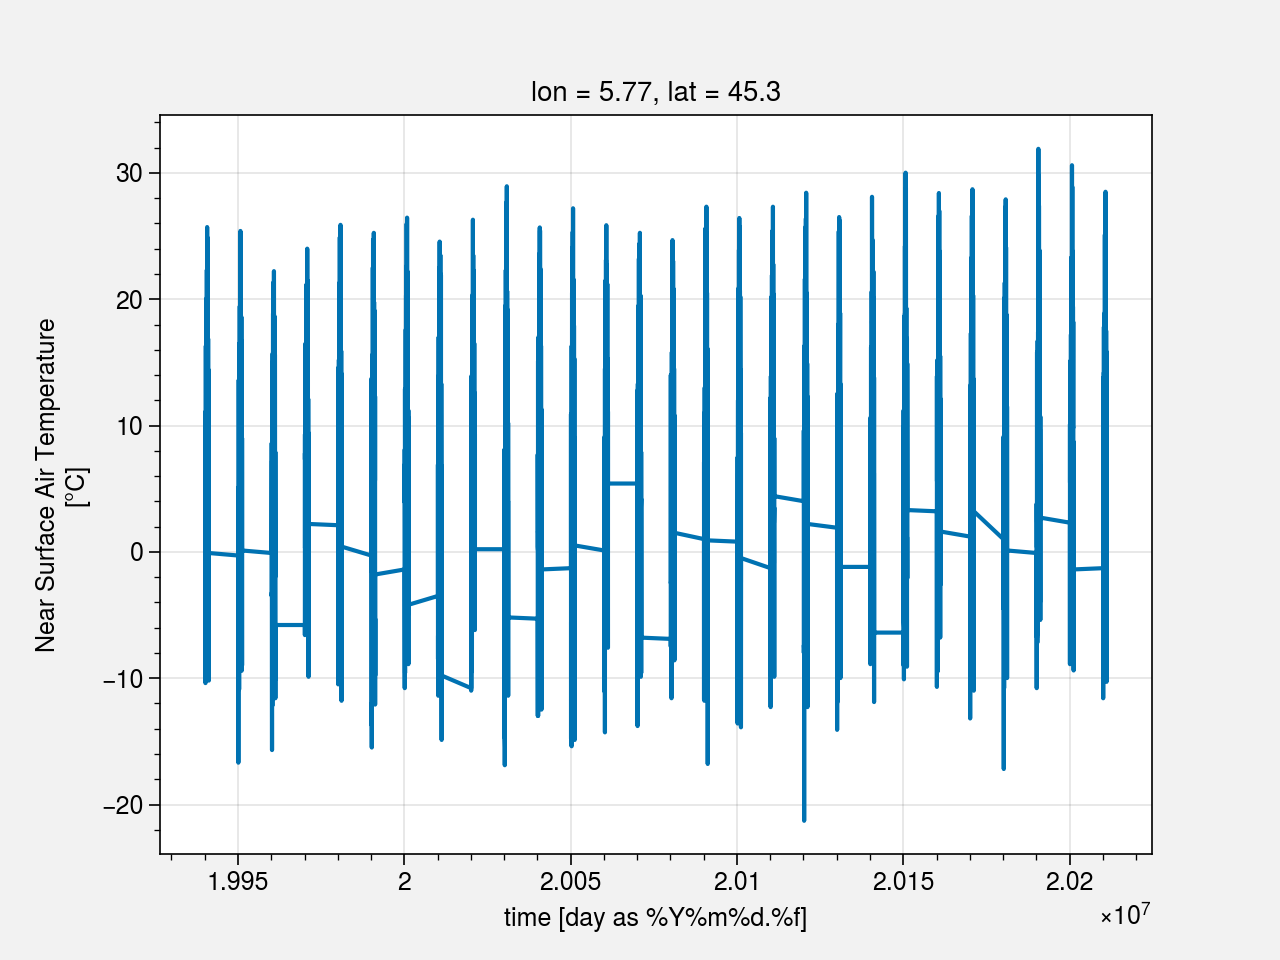

In [42]:
ds.Tair.plot()

### Add Rainf and Snowf (<mark>required by CLASSIC</mark>)

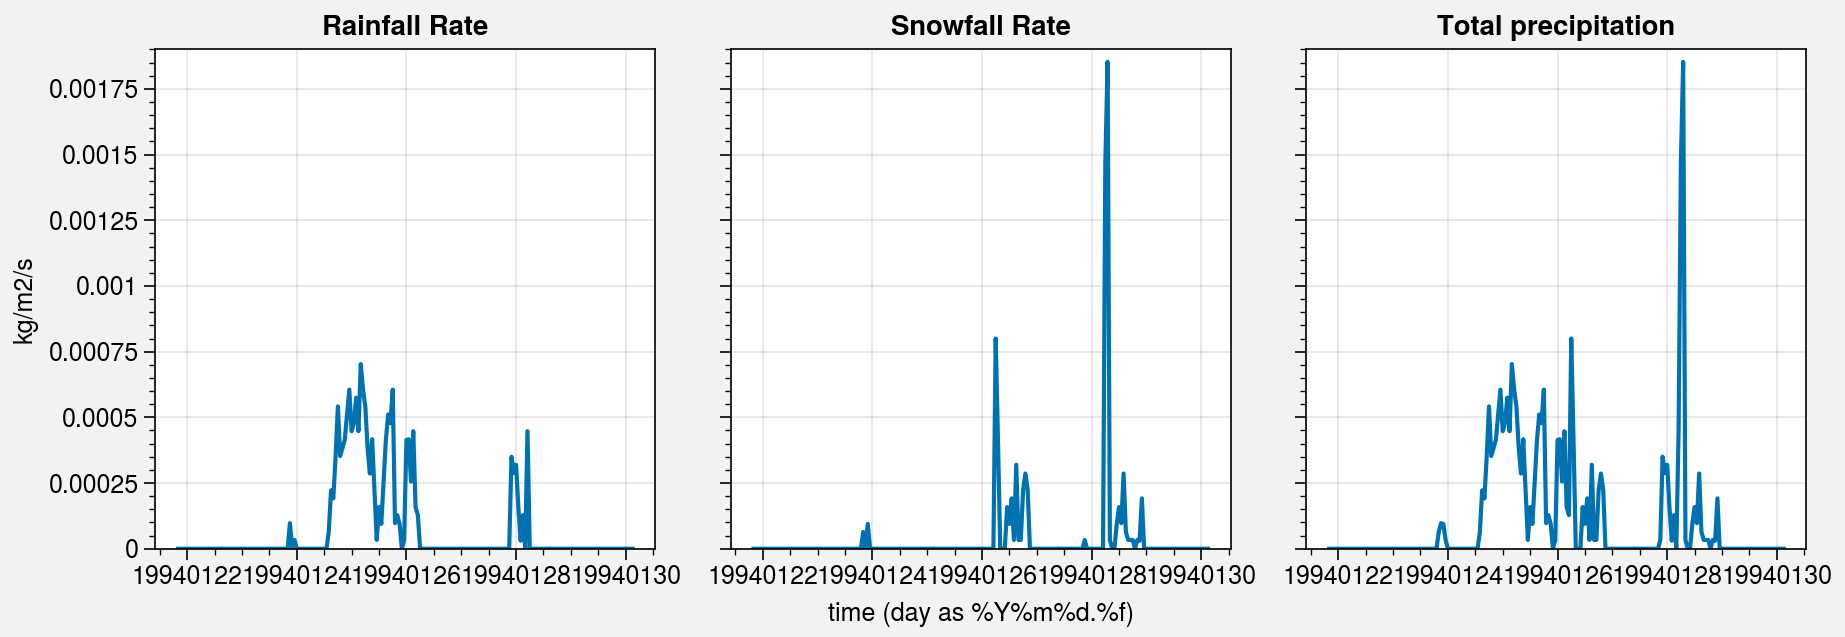

In [43]:
fig, axs = plot.subplots(ncols=3, nrows=1)

i_start = 500
i_end = 700

axs[0].plot(ds.Rainf[i_start:i_end])
axs[1].plot(ds.Snowf[i_start:i_end])
axs[2].plot(ds.Rainf[i_start:i_end] + ds.Snowf[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds.Rainf.attrs['units'], 
        ylim=(0,max(ds.Rainf[i_start:i_end] + ds.Snowf[i_start:i_end]).values.item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds.Rainf.attrs['long_name'], ds.Snowf.attrs['long_name'], 'Total precipitation']
)


In [44]:
ds['TotPrecip'] = ds.Rainf + ds.Snowf
ds.TotPrecip.attrs['long_name'] = 'Total precipitaion rate (Rainf + Snowf)'
ds.TotPrecip.attrs['units'] = ds.Rainf.attrs['units']
ds

<xarray.Dataset>
Dimensions:     (lat: 1, lon: 1, time: 245448)
Coordinates:
  * time        (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon         (lon) float64 5.77
  * lat         (lat) float64 45.3
Data variables:
    CO2air      (time, lat, lon) float32 0.00062 0.00062 ... 0.00062 0.00062
    DIR_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag        (time, lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    HUMREL      (time, lat, lon) float32 99.0 99.0 98.0 98.0 ... 36.0 35.0 28.0
    LWdown      (time, lat, lon) float32 297.8 300.0 298.6 ... 265.3 264.6 265.6
    NEB         (time, lat, lon) float32 0.94 0.95 0.97 0.98 ... 0.07 0.16 0.2
    PSurf       (time, lat, lon) float32 86210.0 86200.0 ... 87867.0 87845.0
    Qair        (time, lat, lon) float32 0.0045386637 ... 0.0024531723
    Rainf       (time, lat, lon) float32 0.0 0.00022222222 0.0 ... 0.0 0.0 0.0
    SCA_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf       (time, lat, lon) float32 0.0019166666 0.0 ... 0.0 0.0
    Tair        (time, lat, lon) float32 0.51000977 0.80999756 ... 10.110016
    Wind        (time, lat, lon) float32 1.8 0.7 2.5 2.2 1.5 ... 0.8 0.8 0.9 0.2
    Wind_DIR    (time, lat, lon) float32 320.0 240.0 120.0 ... 343.0 304.0 291.0
    LAT         (lat, lon) float32 45.295
    LON         (lat, lon) float32 5.765333
    UREF        (lat, lon) float32 10.0
    ZREF        (lat, lon) float32 1.5
    ZS          (lat, lon) float32 1325.0
    aspect      (lat, lon) float32 10.0
    slope       (lat, lon) float32 0.0
    station     (lat, lon) float32 38472400.0
    TotPrecip   (time, lat, lon) float32 0.0019166666 0.00022222222 ... 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

### Add dir and diff SWDown (<mark>required by CLASSIC</mark>)

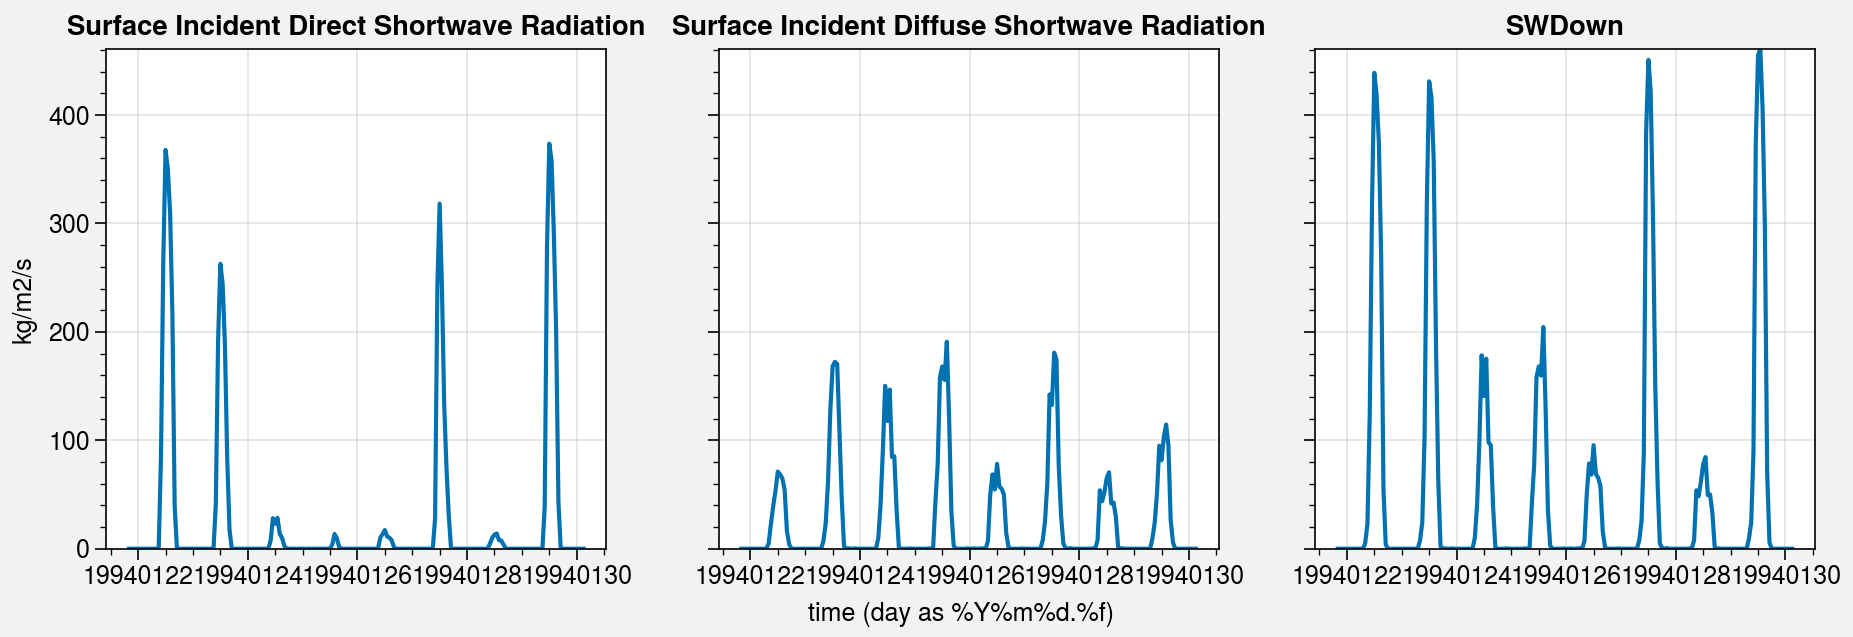

In [45]:
fig, axs = plot.subplots(ncols=3, nrows=1)

i_start = 500
i_end = 700

axs[0].plot(ds.DIR_SWdown[i_start:i_end])
axs[1].plot(ds.SCA_SWdown[i_start:i_end])
axs[2].plot(ds.DIR_SWdown[i_start:i_end] + ds.SCA_SWdown[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds.Rainf.attrs['units'], 
        ylim=(0,max(ds.DIR_SWdown[i_start:i_end] + ds.SCA_SWdown[i_start:i_end]).values.item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds.DIR_SWdown.attrs['long_name'], ds.SCA_SWdown.attrs['long_name'], 'SWDown']
)


In [46]:
ds['SWdown'] = ds.DIR_SWdown + ds.SCA_SWdown
ds.SWdown.attrs['long_name'] = 'Surface downward shortwave radiation'
ds.SWdown.attrs['units'] = ds.DIR_SWdown.attrs['units']
ds

<xarray.Dataset>
Dimensions:     (lat: 1, lon: 1, time: 245448)
Coordinates:
  * time        (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon         (lon) float64 5.77
  * lat         (lat) float64 45.3
Data variables:
    CO2air      (time, lat, lon) float32 0.00062 0.00062 ... 0.00062 0.00062
    DIR_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag        (time, lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    HUMREL      (time, lat, lon) float32 99.0 99.0 98.0 98.0 ... 36.0 35.0 28.0
    LWdown      (time, lat, lon) float32 297.8 300.0 298.6 ... 265.3 264.6 265.6
    NEB         (time, lat, lon) float32 0.94 0.95 0.97 0.98 ... 0.07 0.16 0.2
    PSurf       (time, lat, lon) float32 86210.0 86200.0 ... 87867.0 87845.0
    Qair        (time, lat, lon) float32 0.0045386637 ... 0.0024531723
    Rainf       (time, lat, lon) float32 0.0 0.00022222222 0.0 ... 0.0 0.0 0.0
    SCA_SWdown  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf       (time, lat, lon) float32 0.0019166666 0.0 ... 0.0 0.0
    Tair        (time, lat, lon) float32 0.51000977 0.80999756 ... 10.110016
    Wind        (time, lat, lon) float32 1.8 0.7 2.5 2.2 1.5 ... 0.8 0.8 0.9 0.2
    Wind_DIR    (time, lat, lon) float32 320.0 240.0 120.0 ... 343.0 304.0 291.0
    LAT         (lat, lon) float32 45.295
    LON         (lat, lon) float32 5.765333
    UREF        (lat, lon) float32 10.0
    ZREF        (lat, lon) float32 1.5
    ZS          (lat, lon) float32 1325.0
    aspect      (lat, lon) float32 10.0
    slope       (lat, lon) float32 0.0
    station     (lat, lon) float32 38472400.0
    TotPrecip   (time, lat, lon) float32 0.0019166666 0.00022222222 ... 0.0 0.0
    SWdown      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [47]:
ds['frac_SCA_SWdown'] = ds.SCA_SWdown/(ds.DIR_SWdown + ds.SCA_SWdown)
ds.frac_SCA_SWdown.attrs['long_name'] = 'Fraction of Surface Incident Diffuse Shortwave Radiation'
ds.frac_SCA_SWdown.attrs['units'] = ''
ds

<xarray.Dataset>
Dimensions:          (lat: 1, lon: 1, time: 245448)
Coordinates:
  * time             (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon              (lon) float64 5.77
  * lat              (lat) float64 45.3
Data variables:
    CO2air           (time, lat, lon) float32 0.00062 0.00062 ... 0.00062
    DIR_SWdown       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    flag             (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    HUMREL           (time, lat, lon) float32 99.0 99.0 98.0 ... 36.0 35.0 28.0
    LWdown           (time, lat, lon) float32 297.8 300.0 298.6 ... 264.6 265.6
    NEB              (time, lat, lon) float32 0.94 0.95 0.97 ... 0.07 0.16 0.2
    PSurf            (time, lat, lon) float32 86210.0 86200.0 ... 87845.0
    Qair             (time, lat, lon) float32 0.0045386637 ... 0.0024531723
    Rainf            (time, lat, lon) float32 0.0 0.00022222222 0.0 ... 0.0 0.0
    SCA_SWdown       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Snowf            (time, lat, lon) float32 0.0019166666 0.0 ... 0.0 0.0
    Tair             (time, lat, lon) float32 0.51000977 ... 10.110016
    Wind             (time, lat, lon) float32 1.8 0.7 2.5 2.2 ... 0.8 0.9 0.2
    Wind_DIR         (time, lat, lon) float32 320.0 240.0 120.0 ... 304.0 291.0
    LAT              (lat, lon) float32 45.295
    LON              (lat, lon) float32 5.765333
    UREF             (lat, lon) float32 10.0
    ZREF             (lat, lon) float32 1.5
    ZS               (lat, lon) float32 1325.0
    aspect           (lat, lon) float32 10.0
    slope            (lat, lon) float32 0.0
    station          (lat, lon) float32 38472400.0
    TotPrecip        (time, lat, lon) float32 0.0019166666 0.00022222222 ... 0.0
    SWdown           (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    frac_SCA_SWdown  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

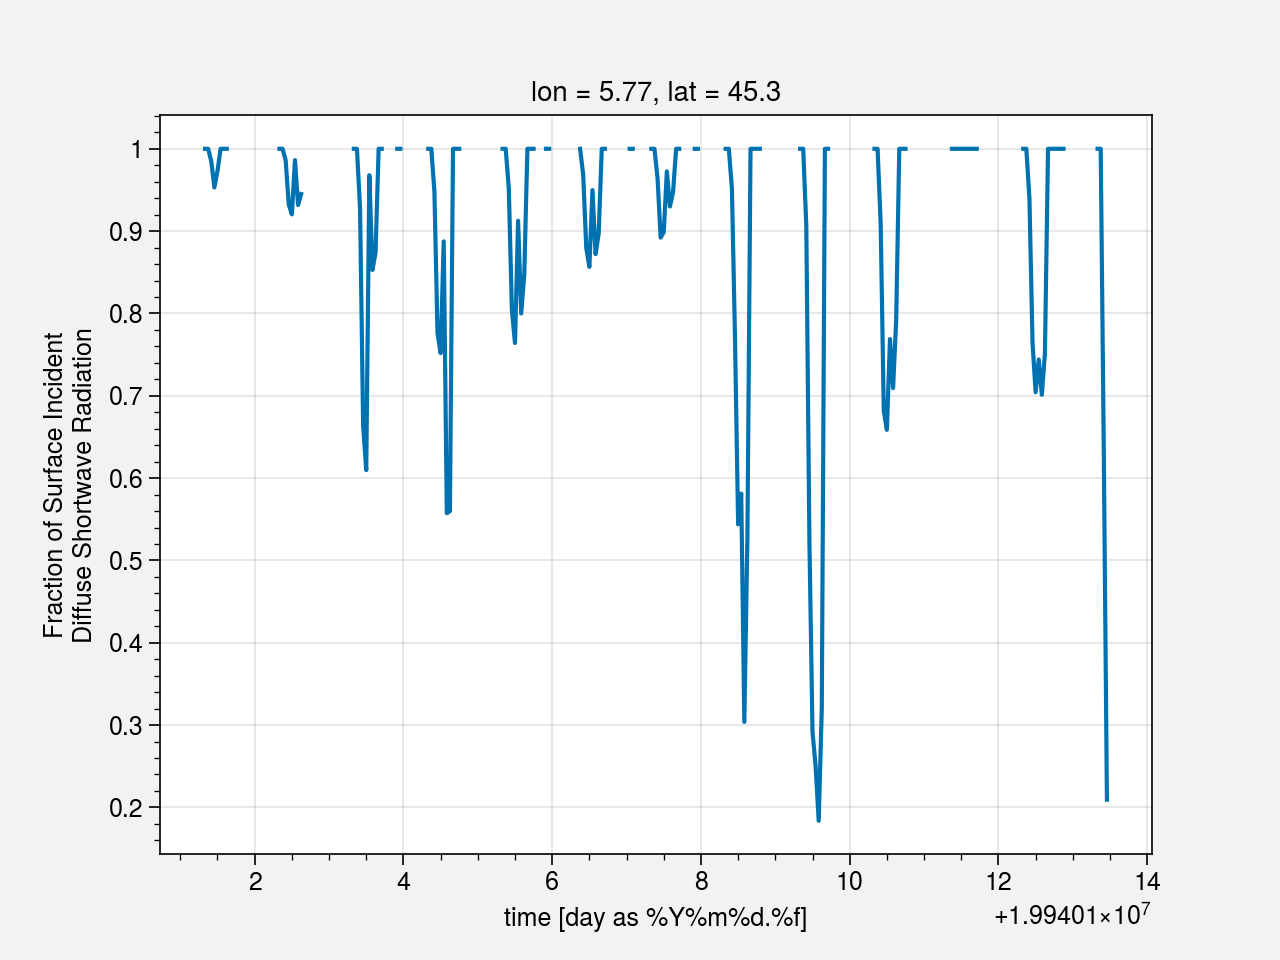

In [48]:
ds.frac_SCA_SWdown.isel(time=slice(0,300)).plot()

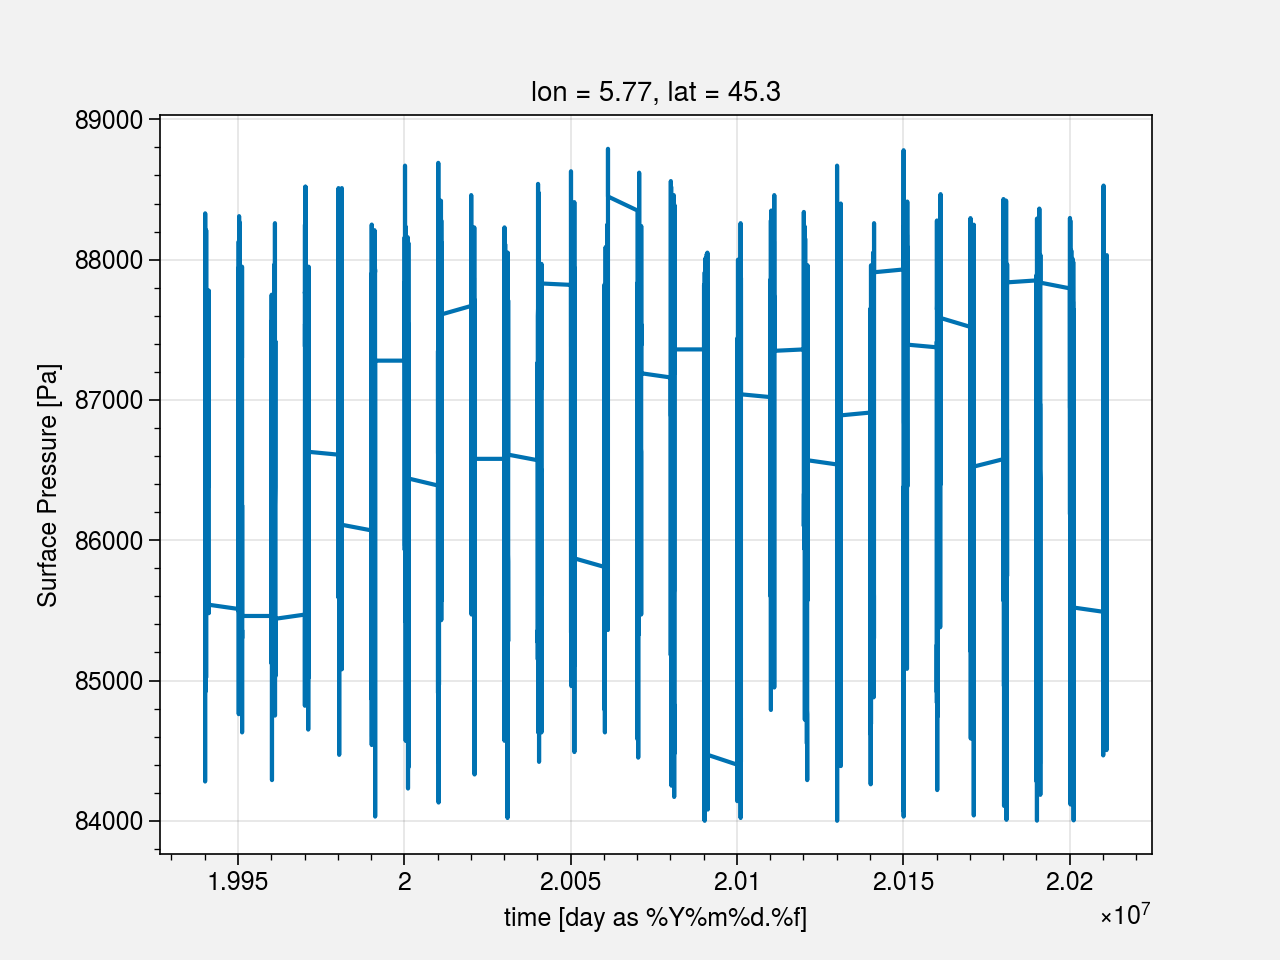

In [51]:
ds.PSurf.plot()

In [52]:
ds.PSurf.mean()

<xarray.DataArray 'PSurf' ()>
array(86713., dtype=float32)

In [55]:
ds['PSurf_const'] = ds.PSurf*0+ds.PSurf.mean()
ds.PSurf_const.attrs['long_name'] = 'Average Surface Pressure'
ds.PSurf_const.attrs['units'] = 'Pa'
ds

<xarray.Dataset>
Dimensions:          (lat: 1, lon: 1, time: 245448)
Coordinates:
  * time             (time) float64 1.994e+07 1.994e+07 ... 2.021e+07 2.021e+07
  * lon              (lon) float64 5.77
  * lat              (lat) float64 45.3
Data variables:
    CO2air           (time, lat, lon) float32 0.00062 0.00062 ... 0.00062
    DIR_SWdown       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    flag             (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    HUMREL           (time, lat, lon) float32 99.0 99.0 98.0 ... 36.0 35.0 28.0
    LWdown           (time, lat, lon) float32 297.8 300.0 298.6 ... 264.6 265.6
    NEB              (time, lat, lon) float32 0.94 0.95 0.97 ... 0.07 0.16 0.2
    PSurf            (time, lat, lon) float32 86210.0 86200.0 ... 87845.0
    Qair             (time, lat, lon) float32 0.0045386637 ... 0.0024531723
    Rainf            (time, lat, lon) float32 0.0 0.00022222222 0.0 ... 0.0 0.0
    SCA_SWdown       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Snowf            (time, lat, lon) float32 0.0019166666 0.0 ... 0.0 0.0
    Tair             (time, lat, lon) float32 0.51000977 ... 10.110016
    Wind             (time, lat, lon) float32 1.8 0.7 2.5 2.2 ... 0.8 0.9 0.2
    Wind_DIR         (time, lat, lon) float32 320.0 240.0 120.0 ... 304.0 291.0
    LAT              (lat, lon) float32 45.295
    LON              (lat, lon) float32 5.765333
    UREF             (lat, lon) float32 10.0
    ZREF             (lat, lon) float32 1.5
    ZS               (lat, lon) float32 1325.0
    aspect           (lat, lon) float32 10.0
    slope            (lat, lon) float32 0.0
    station          (lat, lon) float32 38472400.0
    TotPrecip        (time, lat, lon) float32 0.0019166666 0.00022222222 ... 0.0
    SWdown           (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    frac_SCA_SWdown  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    PSurf_const      (time, lat, lon) float32 86713.0 86713.0 ... 86713.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 15:40:58 2023: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

## Save forcing files

CLASSIC **requires** <mark>one file per forcing variable</mark>

Note: I save the files directly to CLASSIC folder and here to keep more flexibility in the future

In [56]:
for key in ['LWdown', 'SWdown', 'frac_SCA_SWdown', 'PSurf', 'PSurf_const', 'Tair', 'Qair', 'TotPrecip', 'Rainf', 'Wind', 'Snowf']:
    ds[key].to_netcdf(path_out+'/met_insitu_'+site_SnowMIP+'_'+year_start_full+'_'+year_end_full+'_'+key+'.nc')
    ds[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site_SnowMIP+'_'+year_start_full+'_'+year_end_full+'_'+key+'.nc')

In [57]:
!ls {path_out}

met_insitu_cdp_1994_2021_frac_SCA_SWdown.nc
met_insitu_cdp_1994_2021_LWdown.nc
met_insitu_cdp_1994_2021_PSurf_const.nc
met_insitu_cdp_1994_2021_PSurf.nc
met_insitu_cdp_1994_2021_Qair.nc
met_insitu_cdp_1994_2021_Rainf.nc
met_insitu_cdp_1994_2021_Snowf.nc
met_insitu_cdp_1994_2021_SWdown.nc
met_insitu_cdp_1994_2021_Tair.nc
met_insitu_cdp_1994_2021_TotPrecip.nc
met_insitu_cdp_1994_2021_Wind.nc


In [58]:
!ls {path_out_CLASSIC}

met_insitu_cdp_1994_2021_frac_SCA_SWdown.nc
met_insitu_cdp_1994_2021_LWdown.nc
met_insitu_cdp_1994_2021_PSurf_const.nc
met_insitu_cdp_1994_2021_PSurf.nc
met_insitu_cdp_1994_2021_Qair.nc
met_insitu_cdp_1994_2021_Rainf.nc
met_insitu_cdp_1994_2021_Snowf.nc
met_insitu_cdp_1994_2021_SWdown.nc
met_insitu_cdp_1994_2021_Tair.nc
met_insitu_cdp_1994_2021_TotPrecip.nc
met_insitu_cdp_1994_2021_Wind.nc
